# Udactity Data Analyst

## Multivariate Visualizations Excercises

### Scatterplots

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [3]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

In [4]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [5]:
fuel_econ.sample(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
221,32700,Audi,A6,2013,Midsize Cars,Front-Wheel Drive,Automatic (AV-S8),Premium Gasoline,4,2.0,...,98,24.5044,31.4000,32.5529,46.9000,27.5721,320,7,7,Automatic
97,32492,Infiniti,M56x,2013,Midsize Cars,All-Wheel Drive,Automatic (S7),Premium Gasoline,8,5.6,...,104,15.6967,19.4593,22.9117,31.9986,18.2883,487,4,4,Automatic
130,32545,Chevrolet,Cruze,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,1.8,...,94,22.3233,28.5000,33.8346,49.1000,26.3588,336,7,7,Automatic


In [6]:
# Choose random 200 entries to make a plot without much overlapping
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

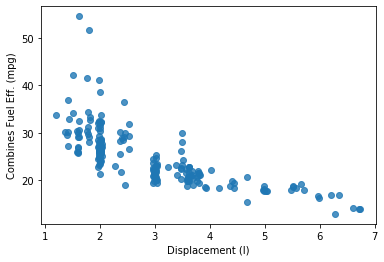

In [7]:
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False)
plt.xlabel('Displacement (l)');
plt.ylabel('Combines Fuel Eff. (mpg)');

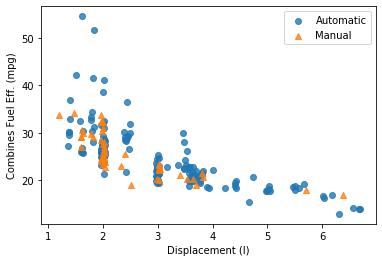

In [8]:
# Make a plot with the third qualitative variable, transmission type, being plotted via shape
ttype_markers = [['Automatic', 'o'], ['Manual', '^']]
for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sb.regplot(data = plot_data, x = 'displ', y = 'comb', x_jitter = 0.04, 
               fit_reg = False, marker = marker);
plt.xlabel('Displacement (l)');
plt.ylabel('Combines Fuel Eff. (mpg)');
plt.legend(['Automatic', 'Manual']);

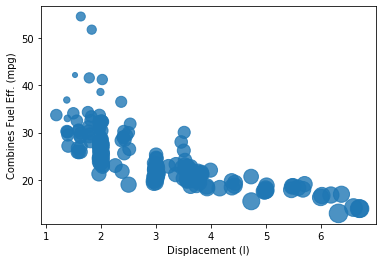

In [9]:
# Make a plot with the third quantitative variable, co2 emission, plotted via size
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False,
          scatter_kws = {'s': fuel_econ_subset['co2']/2});
plt.xlabel('Displacement (l)');
plt.ylabel('Combines Fuel Eff. (mpg)');

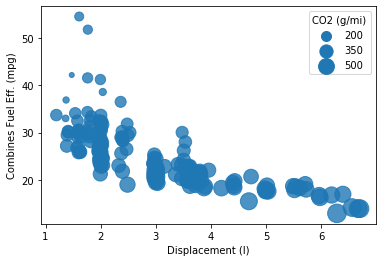

In [10]:
# Build a legend to the last plot
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False,
          scatter_kws = {'s': fuel_econ_subset['co2']/2});
plt.xlabel('Displacement (l)');
plt.ylabel('Combines Fuel Eff. (mpg)');

sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[], s = s/2, color = base_color))
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

### Encoding via Color

Color is a very common encoding for variables, for both qualitative and quantitative variables. If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the "hue" parameter on seaborn's FacetGrid class.

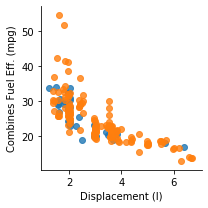

In [11]:
# Make a plot with the third variable being encoded via color
g = sb.FacetGrid(data = fuel_econ_subset , hue = 'trans_type')
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement (l)');
plt.ylabel('Combines Fuel Eff. (mpg)');

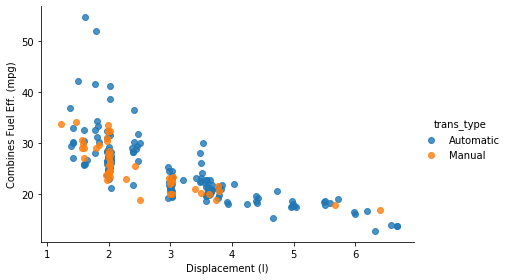

In [12]:
g = sb.FacetGrid(data = fuel_econ_subset , hue = 'trans_type', 
                 hue_order = ['Automatic', 'Manual'], height = 4, aspect = 1.5)
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (l)');
plt.ylabel('Combines Fuel Eff. (mpg)');

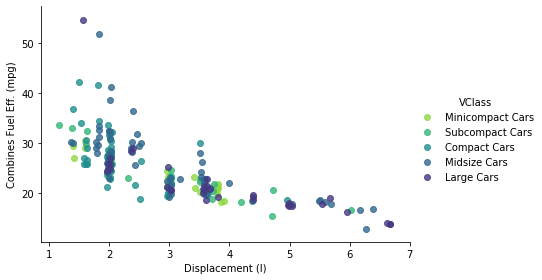

In [13]:
g = sb.FacetGrid(data = fuel_econ_subset , hue = 'VClass', height = 4, 
                 aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (l)');
plt.ylabel('Combines Fuel Eff. (mpg)');

For quantitative variables, we should not take the same approach, since `FacetGrid` expects any variable input for subsetting to be categorical. Instead, we can set color based on numeric value in the scatter function through the `c` parameter.

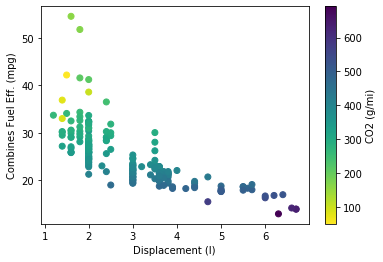

In [14]:
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2',
               cmap = 'viridis_r');
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (l)');
plt.ylabel('Combines Fuel Eff. (mpg)');

### Color Palettes

There are three major classes of color palette to consider: qualitative, sequential, and diverging.

Qualitative palettes are built for nominal-type data. This is the palette class taken by the default palette.

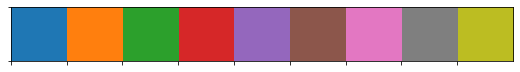

In [15]:
sb.palplot(sb.color_palette(n_colors=9))

For other types of data (ordinal and numeric), a choice may need to be made between a sequential scale and a diverging scale. A sequential palette follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values. The default sequential color map, `viridis`, takes the opposite approach, with dark colors indicating low values, and light values indicating high.

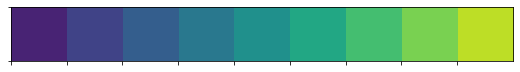

In [16]:
sb.palplot(sb.color_palette('viridis', 9))

If there is a meaningful zero or center value for the variable, you may want to consider using a `diverging` palette. In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

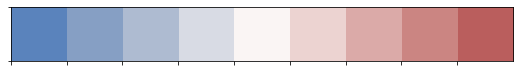

In [17]:
sb.palplot(sb.color_palette('vlag', 9))

### Faceting for Multivariate Data

We can facet bivariate plots to create a multivariate visualization.

In [18]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


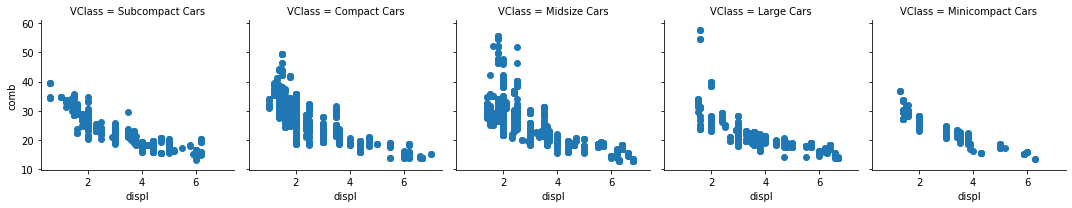

In [19]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.scatter, 'displ', 'comb');

In [20]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

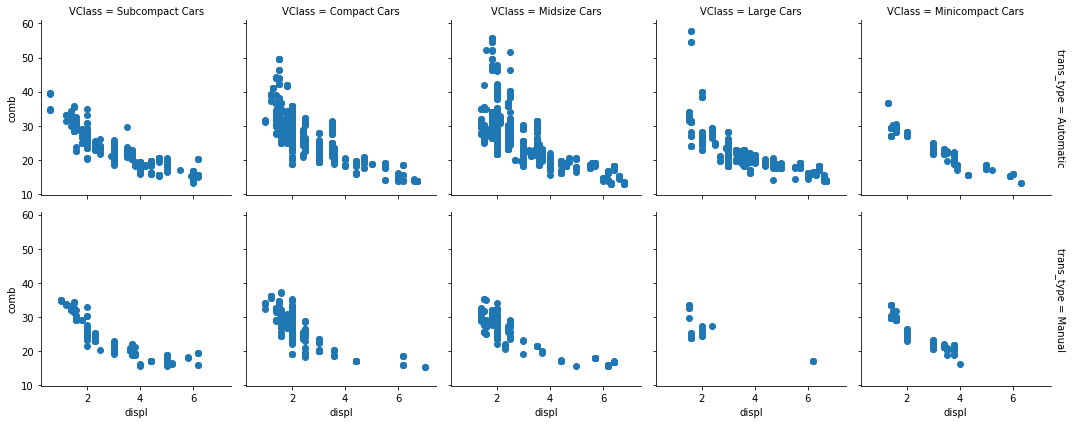

In [21]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type',
                margin_titles = True)
g.map(plt.scatter, 'displ', 'comb');

`FacetGrid` also allows for faceting a variable not just by columns, but also by rows. We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends.

Setting `margin_titles = True` means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. 

### Other adaptations of bivariate plots

An alternative approach for two categorical variables and one numeric variable is to adapt a clustered bar chart using the `barplot` function instead of the countplot function:

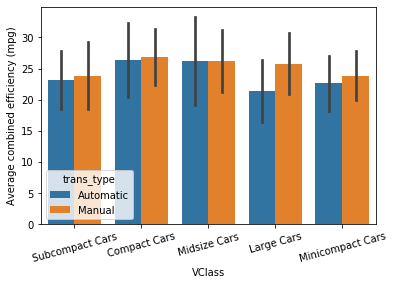

In [22]:
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type',  ci = 'sd')
plt.xticks(rotation = 15)
plt.ylabel('Average combined efficiency (mpg)');

The "hue" parameter can also be used in a similar fashion in the `boxplot`, `violinplot`, and `pointplot` functions to add a categorical third variable to those plots in a clustered fashion. As a special note for pointplot, the default rendering aligns all levels of the "hue" categorical variable vertically. Use the "dodge" parameter to shift the levels in a clustered fashion:

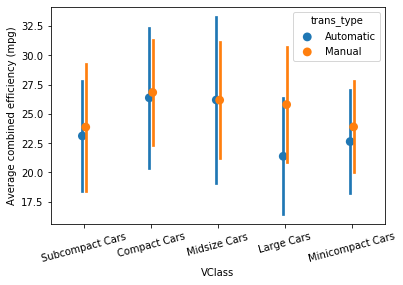

In [23]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type',
            ci = 'sd', linestyles = '', dodge = True)
plt.xticks(rotation = 15)
plt.ylabel('Average combined efficiency (mpg)');

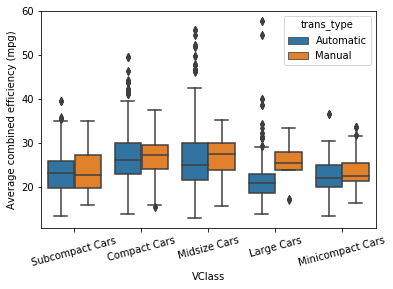

In [24]:
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type')
plt.xticks(rotation = 15)
plt.ylabel('Average combined efficiency (mpg)');

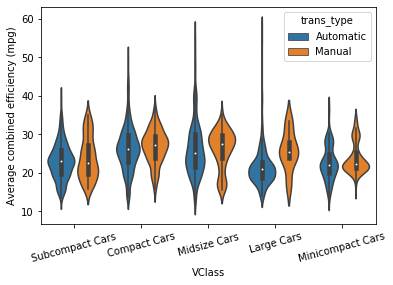

In [25]:
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type')
plt.xticks(rotation = 15)
plt.ylabel('Average combined efficiency (mpg)');

Substituting count on a bar chart or histogram for the mean, median, or some other statistic of a second variable can also be done for bivariate plots like the heat map, clustered bar chart, and line plot, to allow them to depict multivariate relationships.

If we want to depict the mean of a third variable in a 2-d histogram, we need to change the weights of points in the `hist2d` function similar to how we changed the weights in the 1-d histogram.

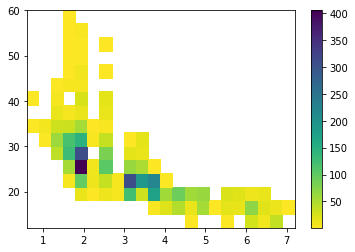

In [26]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58 +3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r',
          bins = [bins_x, bins_y])
plt.colorbar();

In [27]:
displ_bins = pd.cut(fuel_econ['displ'], bins_x, right = False, include_lowest = False, labels = False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right = False, include_lowest = False, labels = False).astype(int)
displ_bins.sample(5)

506     12
737     13
1956     4
902      3
786     11
Name: displ, dtype: int64

In [28]:
comb_bins.sample(5)

3418    3
774     2
368     4
3353    6
725     2
Name: comb, dtype: int64

In [29]:
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points

displ  comb
0      7         3
       9         3
1      6         4
       7         8
2      5        42
       6        62
       7        31
       8        15
       9         7
       10        4
3      3         6
       4        55
       5       130
       6       119
       7        34
       8         7
       10        7
       11        2
       12        4
       13        1
       14        2
       15        2
4      2        15
       3        98
       4       405
       5       311
       6       145
       7        55
       8        14
       9        26
              ... 
9      6        18
10     1         5
       2       173
       3       219
       4         2
11     1        22
       2        58
       3         4
12     1        48
       2        92
13     0         1
       1        15
       2        59
14     1        55
       2        64
15     1         4
16     0         3
       1        17
       2        24
17     1        16
       2        20


In [30]:
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values
n_points

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,   3.,  nan,   3.,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   4.,   8.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  42.,  62.,  31.,  15.,   7.,   4.,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,   6.,  55., 130., 119.,  34.,   7.,  nan,   7.,
          2.,   4.,   1.,   2.,   2.],
       [ nan,  nan,  15.,  98., 405., 311., 145.,  55.,  14.,  26.,   6.,
         10.,   3.,   3.,   5.,  nan],
       [ nan,  nan,   1.,  12.,   9.,  nan,   5.,   1.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  11.,  37., 105.,  82.,  37.,   5.,  15.,  17.,  nan,
          1.,  nan,   1.,  nan,  nan],
       [ nan,  nan,   7.,   6.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan, 123., 311.,  64.,  17.,   2.,  nan,  nan,  nan,  nan,
         nan,  nan,  n

In [31]:
co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]
co2_weights

0        2.722543
1        0.861728
2        2.479769
3        2.578035
4        3.780488
5        2.068421
6        2.168421
7       28.800000
8        3.826531
9        2.664740
10       1.917808
11       0.888889
12       2.450867
13      13.937500
14       1.926941
15       2.676301
16      13.312500
17      13.937500
18      13.312500
19       2.078947
20       1.762557
21       1.840183
22       6.843750
23       7.390625
24       1.789954
25       2.445378
26       2.378151
27       2.344538
28       1.958621
29       1.958621
          ...    
3899     2.462185
3900     2.369231
3901    43.363636
3902     0.809877
3903     3.806122
3904     7.265625
3905     0.851852
3906     2.221053
3907     2.042105
3908     2.221053
3909    20.058824
3910    10.854167
3911     3.238095
3912     1.028939
3913     9.666667
3914     9.666667
3915     0.827160
3916     4.000000
3917     3.682927
3918     3.190476
3919     1.482759
3920     0.993569
3921     0.881481
3922    22.428571
3923     6

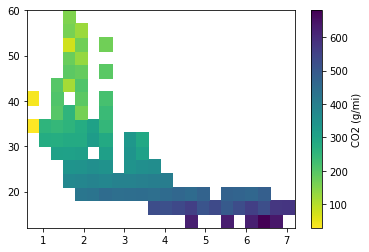

In [39]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58 +3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r',
          bins = [bins_x, bins_y], weights = co2_weights)
plt.colorbar(label = 'CO2 (g/mi)');